**LOGISTIC REGRESSION**

In [70]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [72]:
bank = pd.read_csv("bank_data.csv")
bank

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [73]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [74]:
pd.set_option("display.max.columns", None)
bank

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [75]:
bank.isnull().sum()


age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [76]:
bank.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,0.040698,0.033421,0.817478,0.647741,0.064276,0.287983,0.115171,0.601933,0.282896,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,0.197592,0.179735,0.386278,0.477680,0.245247,0.452828,0.319232,0.489505,0.450411,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
bank.drop(["age"],inplace=True,axis = 1)

In [78]:
bank.drop(["housing"],inplace=True,axis = 1)

In [79]:
bank.drop(["joadmin.","joblue.collar","joentrepreneur","johousemaid"],inplace=True,axis = 1)

In [80]:
bank.drop(["poutsuccess","poutunknown","con_cellular","con_telephone","con_unknown","divorced","married","single","jomanagement","joretired","joself.employed","joservices","jostudent","jotechnician","jounemployed","jounknown"],inplace=True,axis = 1)

In [81]:
bank.isnull().sum()

default        0
balance        0
loan           0
duration       0
campaign       0
pdays          0
previous       0
poutfailure    0
poutother      0
y              0
dtype: int64

<Axes: xlabel='default', ylabel='loan'>

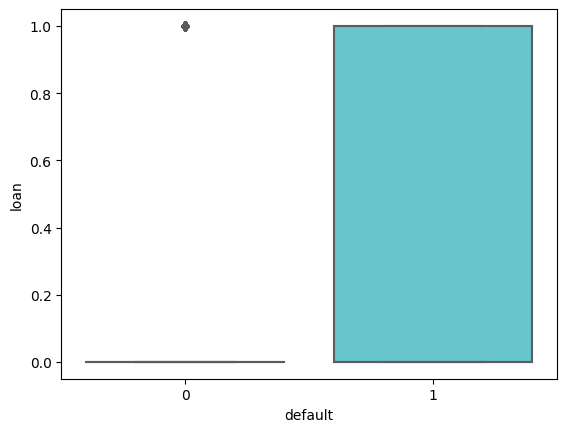

In [82]:
sb.boxplot(x="default",y="loan",data=bank,palette="hls")

<Axes: xlabel='default'>

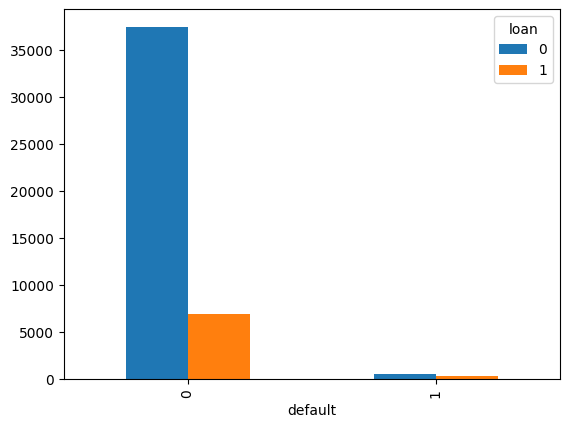

In [83]:
pd.crosstab(bank.default,bank.loan).plot(kind = 'bar')

In [84]:
bank["default"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1
bank["loan"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1
bank["pdays"].fillna(0,inplace=True)

In [85]:
bank.default.mode()
bank.loan.mode()
bank.pdays.mode()
bank.default.mean()

0.018026586450200173

In [86]:
bank.default.fillna(0.01550,inplace=True)

In [87]:
from sklearn.linear_model import LogisticRegression
bank.shape

(45211, 10)

In [88]:
X = bank.iloc[:,[1,2,3,4,5]]
Y = bank.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [89]:
classifier.coef_

array([[-2.12390441e-03,  6.86713833e-01, -1.37218896e-04,
         1.65356297e-02, -2.45154089e-03]])

In [90]:
classifier.predict_proba (X)

array([[9.99704278e-01, 2.95722028e-04],
       [9.73935399e-01, 2.60646009e-02],
       [9.46161080e-01, 5.38389202e-02],
       ...,
       [9.99999910e-01, 9.04376086e-08],
       [9.93154686e-01, 6.84531436e-03],
       [9.99967845e-01, 3.21548466e-05]])

In [91]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank

,default,balance,loan,duration,campaign,pdays,previous,poutfailure,poutother,y,y_pred
0,0,2143,0,261,1,-1,0,0,0,0,0
1,0,29,0,151,1,-1,0,0,0,0,0
2,0,2,1,76,1,-1,0,0,0,0,0
3,0,1506,0,92,1,-1,0,0,0,0,0
4,0,1,0,198,1,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,825,0,977,3,-1,0,0,0,1,0
45207,0,1729,0,456,2,-1,0,0,0,1,0
45208,0,5715,0,1127,5,184,3,0,0,1,0
45209,0,668,0,508,4,-1,0,0,0,0,0


In [92]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df

,default,balance,loan,duration,campaign,pdays,previous,poutfailure,poutother,y,y_pred,0,1
0,0,2143,0,261,1,-1,0,0,0,0,0,0.999704,2.957220e-04
1,0,29,0,151,1,-1,0,0,0,0,0,0.973935,2.606460e-02
2,0,2,1,76,1,-1,0,0,0,0,0,0.946161,5.383892e-02
3,0,1506,0,92,1,-1,0,0,0,0,0,0.998830,1.169887e-03
4,0,1,0,198,1,-1,0,0,0,0,0,0.972555,2.744489e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,825,0,977,3,-1,0,0,0,1,0,0.995466,4.533730e-03
45207,0,1729,0,456,2,-1,0,0,0,1,0,0.999295,7.049204e-04
45208,0,5715,0,1127,5,184,3,0,0,1,0,1.000000,9.043761e-08
45209,0,668,0,508,4,-1,0,0,0,0,0,0.993155,6.845314e-03


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[44360    36]
 [  798    17]]


In [94]:
pd.crosstab(y_pred,Y)

default,0,1
row_0,,
0,44360,798
1,36,17


In [95]:
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy

0.9815531618411448

In [96]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44396
           1       0.32      0.02      0.04       815

    accuracy                           0.98     45211
   macro avg       0.65      0.51      0.51     45211
weighted avg       0.97      0.98      0.97     45211



In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.5100240059210552

In [98]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])

In [99]:
y_prob1

,0
0,2.957220e-04
1,2.606460e-02
2,5.383892e-02
3,1.169887e-03
4,2.744489e-02
...,...
45206,4.533730e-03
45207,7.049204e-04
45208,9.043761e-08
45209,6.845314e-03


In [100]:
import statsmodels.api as sm

In [101]:
logit = sm.Logit(Y, X)

In [102]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.104006
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 May 2023   Pseudo R-squ.:                 -0.1523
Time:                        10:35:28   Log-Likelihood:                -4702.2
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance       -0.0026   7.35e-05    -35.603      0.000      -0.003      -0.002
loan          -0.3429      0.073     -4.688      0.000      -0.486      -0.200
duration      -0.0083      0.000    -32.584      0.000      -0.009      -0.008
campaign      -0.5432      0.020    -27.645      0.000      -0.582      -0.505
pdays         -0.0061      0.001    -11.362      0.000      -0.007      -0.005
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

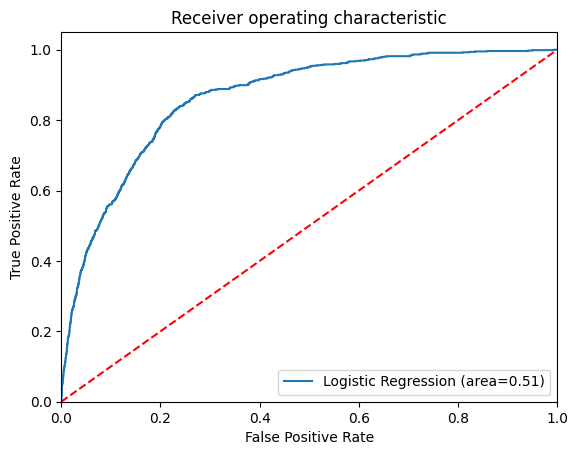

In [103]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [104]:
# false positive rate
fpr

array([0.        , 0.        , 0.        , ..., 0.99313001, 0.99313001,
       1.        ])

In [105]:
#true positive rate
tpr

array([0.        , 0.00122699, 0.00245399, ..., 0.99877301, 1.        ,
       1.        ])

In [106]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.022944


In [108]:
threshold = 0.022944
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84     44396
           1       0.06      0.87      0.11       815

    accuracy                           0.73     45211
   macro avg       0.53      0.80      0.47     45211
weighted avg       0.98      0.73      0.83     45211

